In [1]:
from PIL import Image
import cv2
import pytesseract
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os

In [2]:
def denoise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15) 
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #COLOR_BGR2GRAY)
def remove_noise(image, kernel=(6,6)):
    return cv2.blur(image, kernel)
def gaussian_filter(image, kernel=(5,5)):
    return cv2.GaussianBlur(image, kernel, 0)
def adaptive_th(image):
    return cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
def dilate(image, i=2, kernel=(2,2)):
    kernel = np.ones(kernel, np.uint8)
    return cv2.dilate(image, kernel, iterations = i)
def erode(image, it=1, kernel=(2,2)):
    kernel = np.ones(kernel, np.uint8)
    return cv2.erode(image, kernel, iterations = it)
def opening(image):
    kernel = np.ones((2,2), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
def canny(image):
    return cv2.Canny(image, 100, 200)
def log(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return cv2.Laplacian(image,cv2.CV_16S, ksize=3)
def threshold(image, limiar = 127, tipo=cv2.THRESH_BINARY):
    ret3,th3 = cv2.threshold(image,limiar,255,tipo) #| cv2.THRESH_OTSU)
    return th3
def bilateral_filter(image):
    return cv2.bilateralFilter(image, 13, 15, 15)

In [3]:
diretorio_tumor = 'tumor_cerebral/Brain Tumor Data Set/Brain Tumor/'
diretorio_placas = 'archive/images_reduzido/'
diretorio_ruido = 'imagens_ruido/'
imagens_placas = []
imagens_ruido = []
imagens_tumor = []

In [4]:
for dirname, _, filenames in os.walk(diretorio_placas):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        imagens_placas.append(cv2.imread(os.path.join(dirname, filename)))

In [5]:
for dirname, _, filenames in os.walk(diretorio_ruido):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        imagens_ruido.append(cv2.imread(os.path.join(dirname, filename)))

In [6]:
for dirname, _, filenames in os.walk(diretorio_tumor):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        imagens_tumor.append(cv2.imread(os.path.join(dirname, filename)))

261121.0


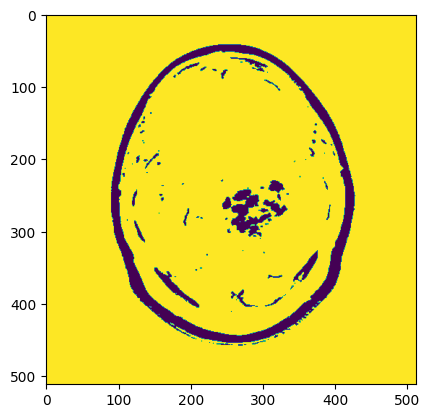

In [107]:
tumor = imagens_tumor[0]
tumor = get_grayscale(tumor)
tumor_th = threshold(tumor, limiar=80, tipo=cv2.THRESH_BINARY_INV)
cnts = cv2.findContours(tumor_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
for c in cnts:
    print(cv2.contourArea(c))
    if cv2.contourArea(c) > 10:
        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(tumor, (x,y), (x+w, y+h), (0,0,255), 1)

plt.imshow(tumor_th)

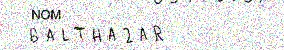

In [78]:
img_cv = cv2.imread(r'imagens_ruido/TRAIN_00001.jpg')

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

Image.open('imagens_ruido/TRAIN_00001.jpg')

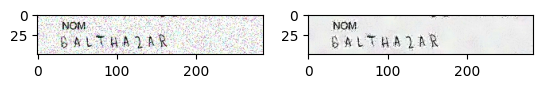

In [79]:
dst = cv2.fastNlMeansDenoisingColored(img_cv, None, 10, 10, 7, 15) 
plt.subplot(121), plt.imshow(img_cv) 
plt.subplot(122), plt.imshow(dst)
plt.show()

In [7]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

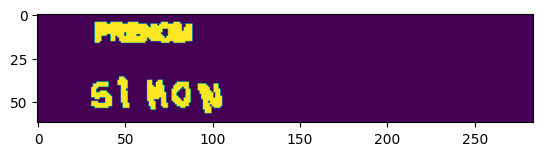

In [8]:
#Escrita à mão
def encontrar_letras(img):
    letras = []
    filter = denoise(img)
    gray = get_grayscale(filter)
    limiar = threshold(gray, limiar=127, tipo=cv2.THRESH_BINARY_INV)
    #plt.imshow(limiar)
    final_img = dilate(limiar, kernel=(2,2))
    #final_img = erode(final_img, kernel=(2,2))
    #final_img = opening(limiar)
    plt.imshow(final_img)
    #plt.imshow(final_img)
    text = pytesseract.image_to_string(final_img, config='--psm 11')
    cnts = cv2.findContours(final_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x,y,w,h) = cv2.boundingRect(c)
            cv2.rectangle(final_img, (x,y), (x+w, y+h), (255,255,255), 1)
    return text, final_img

#plt.imshow(images[0])
text, img = encontrar_letras(imagens_ruido[1]) 
print(text)
plt.imshow(img)

In [17]:
images = []
diretorio_placas = 'archive/images_reduzido/'
diretorio_ruido = 'imagens_ruido/'
for dirname, _, filenames in os.walk(diretorio_placas):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        images.append(cv2.imread(os.path.join(dirname, filename)))

In [18]:
# recortar a placa
X=[]
IMAGE_SIZE = 224
for img in imagens_placas:
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))
X[:1]

[array([[[135, 108,  54],
         [158, 124,  45],
         [179, 146,  79],
         ...,
         [ 41,  43,  42],
         [ 43,  41,  40],
         [ 37,  36,  34]],
 
        [[128, 105,  53],
         [154, 120,  41],
         [149, 119,  53],
         ...,
         [ 46,  46,  45],
         [ 42,  44,  41],
         [ 35,  37,  34]],
 
        [[127, 108,  63],
         [153, 121,  43],
         [153, 126,  63],
         ...,
         [ 44,  41,  41],
         [ 47,  49,  45],
         [ 36,  38,  34]],
 
        ...,
 
        [[ 40,  48,  71],
         [ 41,  49,  72],
         [ 42,  50,  73],
         ...,
         [ 43,  62,  99],
         [ 46,  67, 101],
         [ 47,  67, 102]],
 
        [[ 44,  52,  75],
         [ 43,  51,  74],
         [ 41,  49,  72],
         ...,
         [ 42,  62,  99],
         [ 47,  66, 103],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 41,  50,  73],
         [ 39,  47,  70],
         ...,
         [ 45,  64, 102],
  

In [19]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [20]:
path = 'archive/annotations'
text_files = ['archive/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [21]:
plt.figure(figsize=(10,20))
for i in range(0,6) :
    gray = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)

    image = cv2.rectangle(gray,(y[i][0],y[i][1]),(y[i][2],y[i][3]),(255, 0, 0))
    h,w,d = image.shape
    
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(gray)

ValueError: not enough values to unpack (expected 3, got 2)

<Figure size 1000x2000 with 0 Axes>

(146, 144) (75, 115) (224, 224, 3)
(29, 71, 3)


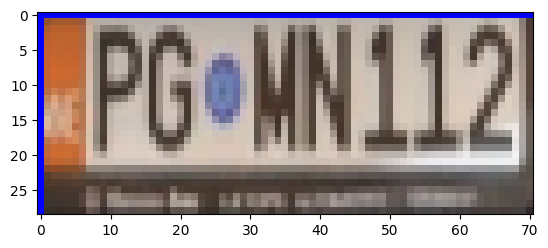

In [26]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
print((y[1][0],y[1][1]),(y[1][2],y[1][3]), X[1].shape)
roi = image[y[1][3]:y[1][1], y[1][2]:y[1][0]]
print(roi.shape)
plt.imshow(roi)
plt.show()

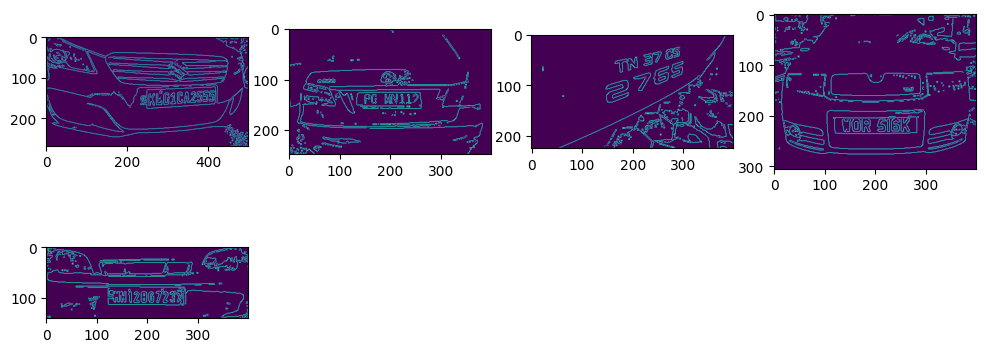

In [34]:
w = 100
h = 100
fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 5
i = 1
for img in images[:5]:
    fig.add_subplot(rows, columns, i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = get_grayscale(img)
    #filtro = gaussian_filter(gray)
    limiar = threshold(gray, limiar=70)
    '''
    erodido = opening(bilateral)'''
    edged = canny(limiar)
    plt.imshow(edged)
    i += 1
plt.show()


In [7]:
import imutils

img = cv2.imread('archive/images/Cars1.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bilateral = gaussian_filter(gray)
edged = canny(bilateral)
otsu = otsu_th(bilateral)

contorno = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contorno = imutils.grab_contours(contorno)
contorno = sorted(contorno, key = cv2.contourArea, reverse = True)[:5]
for c in contorno:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018*peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
if screenCnt is None:
    detected =  0
    print('Sem contorno')
else:
    detected = 1
if(detected == 1):
    cv2.drawContours(img, [screenCnt], -1, (0,0,255), 3)
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
(x,y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]
plt.imshow(img)

NameError: name 'screenCnt' is not defined

KL/G40A2555

PGeWN112


WOR SIGK J

a


ik.)

DZI7 YXR

———_

“MH15808877|

Pulp aes

—

_

s

2 VIRGINIA @ N |

ar

6526 JHD




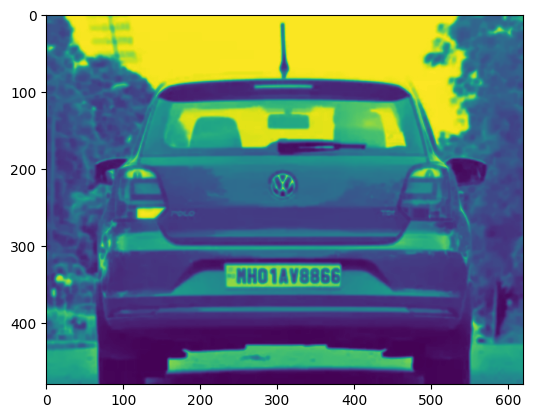

In [8]:
#img = cv2.imread('archive/images/Modificadas/Carros01.jpg', cv2.IMREAD_COLOR)

for img in images: 
    img = cv2.resize(img, (620,480))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gaussian_filter(gray)
    edged = canny(gray)
    contorno = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contorno = imutils.grab_contours(contorno)
    contorno = sorted(contorno, key = cv2.contourArea, reverse = True)[:5]
    for c in contorno:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018*peri, True)
        if len(approx) == 4:
            screenCnt = approx
            break
    if screenCnt is None:
        detected =  0
        print('Sem contorno')
    else:
        detected = 1
    if(detected == 1):
        cv2.drawContours(img, [screenCnt], -1, (0,0,255), 3)
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    (x,y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = gray[topx:bottomx+1, topy:bottomy+1]
    text = pytesseract.image_to_string(Cropped, config='--psm 11')
    print(text)

#gray = bilateral_filter(gray)
#edged = canny(gray)
plt.imshow(erode(gray))

In [22]:
import imutils

contorno = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contorno = imutils.grab_contours(contorno)
contorno = sorted(contorno, key = cv2.contourArea, reverse = True)[:5]

In [23]:
for c in contorno:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018*peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break
if screenCnt is None:
    detected =  0
    print('Sem contorno')
else:
    detected = 1
if(detected == 1):
    cv2.drawContours(img, [screenCnt], -1, (0,0,255), 3)

In [24]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [25]:
(x,y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

In [26]:
text = pytesseract.image_to_string(Cropped, config='--psm 11')
text

'PGeMN112\n'

In [225]:
img = cv2.imread('archive/images/Cars0.png', cv2.IMREAD_GRAYSCALE)
otsu = otsu_th(gaussian_filter(img))

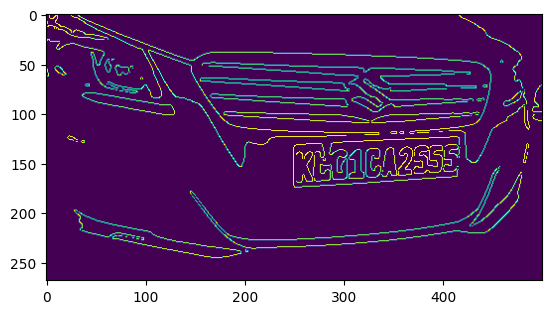

In [229]:
plt.imshow(canny(otsu))

In [230]:
from pytesseract import Output

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [233]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Cannot handle this data type: (1, 1, 3), <i2

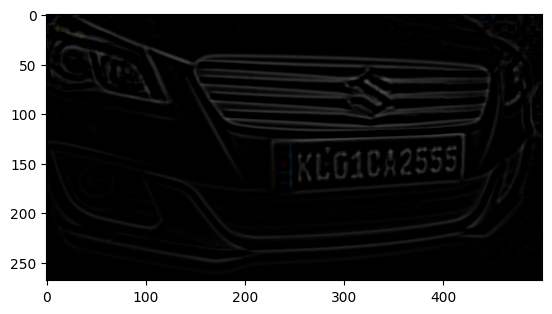

In [176]:
proc_image = log(noise)
plt.imshow(gaussian_filter(proc_image))
print('texto', pytesseract.image_to_string(proc_image)))